In [1]:
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from sklearn.model_selection import train_test_split
from datetime import datetime
import os
import itertools
import io
import sklearn
from sklearn.metrics import confusion_matrix
# Load the TensorBoard notebook extension.
%load_ext tensorboard
import seaborn as sns

In [2]:
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [3]:
keras.__version__

'2.4.0'

In [4]:
path = "C:/Users/suhas/Documents/Mini Project/Leaves/"
test = "C:/Users/suhas/Documents/Mini Project/Leaves/Test"

In [5]:
print(tf.test.gpu_device_name())

/device:GPU:0


In [6]:
IMAGE_SIZE = 100
num_classes = 32
epochs = 100
initializer = 'he_normal'

In [7]:
def label(img_name):
    num = img_name.split('_')[1]
    #print(num)
    if num == 'pubescent bamboo':
        return 0 
    elif num == 'chinese horse chestnut':
        return 1 
    elif num == 'anhui barberry':
        return 2 
    elif num == 'chinese redbud':
        return 3
    elif num == 'true indigo':
        return 4
    elif num == 'japanese maple':
        return 5 
    elif num == 'nanmu':
        return 6 
    elif num == 'castor aralia':
        return 7 
    elif num == 'chinese cinnamon':
        return 8 
    elif num == 'goldenrain tree':
        return 9 
    elif num == 'big fruited holly':
        return 10 
    elif num == 'japanese chestwood':
        return 11 
    elif num == 'wintersweet':
        return 12 
    elif num == 'camphor tree':
        return 13
    elif num == 'japan arrowwood':
        return 14
    elif num == 'sweet osmanthus':
        return 15
    elif num == 'deodar':
        return 16
    elif num == 'ginkgo':
        return 17 
    elif num == 'crape myrtle':
        return 18 
    elif num == 'oleandar':
        return 19
    elif num == 'yew plum pie':
        return 20
    elif num == 'japanese flowering cherry':
        return 21 
    elif num == 'glossy privet':
        return 22
    elif num == 'chinese toon':
        return 23
    elif num == 'peach':
        return 24
    elif num == 'ford woodlotus':
        return 25
    elif num == 'trident maple':
        return 26
    elif num == 'beales barberry':
        return 27
    elif num == 'southern magnolia':
        return 28
    elif num == 'canadian poplar':
        return 29
    elif num == 'chinese tulip tree':
        return 30
    elif num == 'tangerine':
        return 31

# Creating Dataset

In [8]:
def create_dataset(path):
    data = []
    for folder in os.scandir(path):
        if "leaf" in str(folder):
            for image in os.scandir(os.path.join(path, folder)):
                leaf = label(folder.name)
                if (leaf == None):
                    print(folder.name)
                    break
                img = cv2.imread(os.path.join(path, folder, image))

                # Basic processing
                '''imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

                imgBlur = cv2.GaussianBlur(imgGray, (3, 3), 0)
                thresh, imgBW = cv2.threshold(imgBlur, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
                imgInv = cv2.bitwise_not(imgBW)
                kernel = np.ones((50, 50))
                imgClosed = cv2.morphologyEx(imgInv, cv2.MORPH_CLOSE, kernel)'''

                # Resize
                new = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
                #Adding third dimension to shape
                data.append([new, leaf])
    return data

In [9]:
data = create_dataset(path)

In [10]:
X = np.array([d[0] for d in data])
len(X)

1907

In [11]:
X = np.divide(X, 255)
len(X)
X.shape

(1907, 100, 100, 3)

In [12]:
y = np.array([d[1] for d in data])
len(y)

1907

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state = 1, stratify=y_train)

In [14]:
class_names = list(range(32))
class_names

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31]

# CNN

In [30]:
model = Sequential([
    layers.InputLayer(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu', kernel_initializer=initializer),
    layers.MaxPool2D(),
    layers.BatchNormalization(),
    # Dropout layer for regularisation
    layers.Dropout(rate=0.5),
    layers.Conv2D(32, 3, padding='same', activation='relu', kernel_initializer=initializer),
    layers.MaxPool2D(),
    layers.BatchNormalization(),
    # Dropout layer for regularisation
    layers.Dropout(rate=0.5),
    layers.Conv2D(64, 5, padding='same', activation='relu', kernel_initializer=initializer),
    layers.MaxPool2D(),
    layers.BatchNormalization(),
    # Dropout layer for regularisation
    layers.Dropout(rate=0.5),
    # Flattening output to connect to Densely Connected Layers
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_initializer=initializer),
    layers.BatchNormalization(),
    layers.Dense(num_classes, activation='softmax', kernel_initializer=initializer)
])

In [31]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [32]:
X_train.shape

(1072, 100, 100, 3)

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 50, 50, 16)        64        
_________________________________________________________________
dropout_3 (Dropout)          (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 25, 25, 32)       

In [19]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20)

## Confusion Matrix


In [20]:
def plot_confusion_matrix(cm, class_names):
  """
  Returns a matplotlib figure containing the plotted confusion matrix.

  Args:
    cm (array, shape = [n, n]): a confusion matrix of integer classes
    class_names (array, shape = [n]): String names of the integer classes
  """
  figure = plt.figure(figsize=(8, 8))
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title("Confusion matrix")
  plt.colorbar()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names, rotation=45)
  plt.yticks(tick_marks, class_names)

  # Compute the labels from the normalized confusion matrix.
  labels = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)

  # Use white text if squares are dark; otherwise black.
  threshold = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    color = "white" if cm[i, j] > threshold else "black"
    plt.text(j, i, labels[i, j], horizontalalignment="center", color=color)

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  return figure

In [21]:
# Clear out prior logging data.
!rm -rf logs/image

logdir = "logs/image/" + datetime.now().strftime("%Y%m%d-%H%M%S")
# Define the basic TensorBoard callback.
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
file_writer_cm = tf.summary.create_file_writer(logdir + '/cm')

'rm' is not recognized as an internal or external command,
operable program or batch file.


In [22]:
def log_confusion_matrix(epoch, logs):
  # Use the model to predict the values from the validation dataset.
  test_pred_raw = model.predict(X_test)
  test_pred = np.argmax(test_pred_raw, axis=1)

  # Calculate the confusion matrix.
  cm = sklearn.metrics.confusion_matrix(y_test, test_pred)
  # Log the confusion matrix as an image summary.
  figure = plot_confusion_matrix(cm, class_names=class_names)
  cm_image = plot_to_image(figure)

  # Log the confusion matrix as an image summary.
  with file_writer_cm.as_default():
    tf.summary.image("Confusion Matrix", cm_image, step=epoch)

# Define the per-epoch callback.
cm_callback = keras.callbacks.LambdaCallback(on_epoch_end=log_confusion_matrix)

In [23]:
def plot_to_image(figure):
  """Converts the matplotlib plot specified by 'figure' to a PNG image and
  returns it. The supplied figure is closed and inaccessible after this call."""
  # Save the plot to a PNG in memory.
  buf = io.BytesIO()
  plt.savefig(buf, format='png')
  # Closing the figure prevents it from being displayed directly inside
  # the notebook.
  plt.close(figure)
  buf.seek(0)
  # Convert PNG buffer to TF image
  image = tf.image.decode_png(buf.getvalue(), channels=4)
  # Add the batch dimension
  image = tf.expand_dims(image, 0)
  return image

In [34]:
# Start TensorBoard.
#%tensorboard --logdir logs/image

history = model.fit(x=X_train, y=y_train, epochs=epochs, validation_data = (X_val, y_val), use_multiprocessing = True, batch_size=32, callbacks=[callback])

Epoch 1/100
34/34 [==============================] - 1s 15ms/step - loss: 3.2085 - accuracy: 0.3424 - val_loss: 3.3795 - val_accuracy: 0.1508
Epoch 2/100
34/34 [==============================] - 0s 11ms/step - loss: 3.0079 - accuracy: 0.5457 - val_loss: 3.4149 - val_accuracy: 0.0782
Epoch 3/100
34/34 [==============================] - 0s 11ms/step - loss: 2.9068 - accuracy: 0.6418 - val_loss: 3.4166 - val_accuracy: 0.1034
Epoch 4/100
34/34 [==============================] - 0s 10ms/step - loss: 2.8501 - accuracy: 0.6978 - val_loss: 3.3859 - val_accuracy: 0.1425
Epoch 5/100
34/34 [==============================] - 0s 11ms/step - loss: 2.7953 - accuracy: 0.7481 - val_loss: 3.4310 - val_accuracy: 0.0810
Epoch 6/100
34/34 [==============================] - 0s 11ms/step - loss: 2.7512 - accuracy: 0.7994 - val_loss: 3.4603 - val_accuracy: 0.0419
Epoch 7/100
34/34 [==============================] - 0s 11ms/step - loss: 2.7121 - accuracy: 0.8368 - val_loss: 3.4335 - val_accuracy: 0.0782
Epoch 

34/34 [==============================] - 0s 11ms/step - loss: 2.5276 - accuracy: 0.9925 - val_loss: 2.9104 - val_accuracy: 0.6089
Epoch 59/100
34/34 [==============================] - 0s 12ms/step - loss: 2.5272 - accuracy: 0.9935 - val_loss: 2.7420 - val_accuracy: 0.7933
Epoch 60/100
34/34 [==============================] - 0s 11ms/step - loss: 2.5269 - accuracy: 0.9935 - val_loss: 2.7459 - val_accuracy: 0.7821
Epoch 61/100
34/34 [==============================] - 0s 11ms/step - loss: 2.5264 - accuracy: 0.9925 - val_loss: 2.8724 - val_accuracy: 0.6536
Epoch 62/100
34/34 [==============================] - 0s 11ms/step - loss: 2.5281 - accuracy: 0.9935 - val_loss: 2.6890 - val_accuracy: 0.8324
Epoch 63/100
34/34 [==============================] - 0s 11ms/step - loss: 2.5276 - accuracy: 0.9944 - val_loss: 2.7813 - val_accuracy: 0.7514
Epoch 64/100
34/34 [==============================] - 0s 11ms/step - loss: 2.5256 - accuracy: 0.9944 - val_loss: 2.8027 - val_accuracy: 0.7263
Epoch 65/100

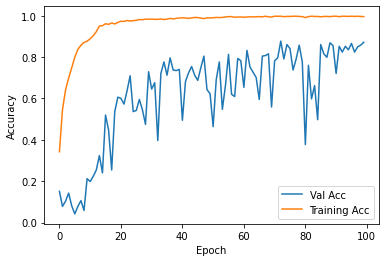

In [35]:
plt.figure()
plt.plot([i for i in range(epochs)], history.history['val_accuracy'], label='Val Acc')
plt.plot([i for i in range(epochs)], history.history['accuracy'], label='Training Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [36]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [37]:
model.evaluate(X_test, y_test)

15/15 [==============================] - 0s 4ms/step - loss: 2.6688 - accuracy: 0.8574


[2.6687800884246826, 0.857442319393158]

In [ ]:
tf.keras.models.save_model(model, 'C:/Users/suhas/Documents/College Projects/Leaf-Classification-Medicinal/model')

In [38]:
max(history.history['val_accuracy'])

0.8770949840545654

## Confusion Matrix with Seaborn (On Test Data)

In [39]:
pred = model.predict(X_test)

In [44]:
conf = confusion_matrix(y_test, np.argmax(pred, axis = 1))

<AxesSubplot:>

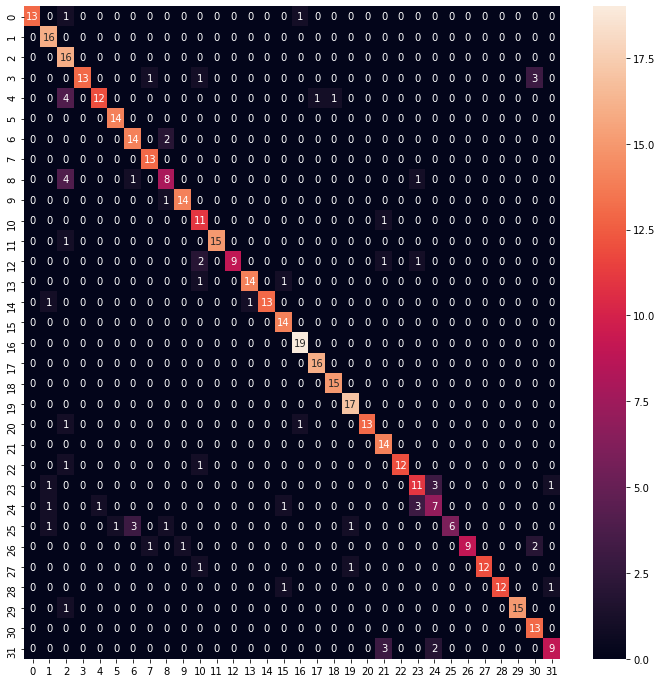

In [50]:
plt.figure(figsize=(12, 12))
sns.heatmap(conf, annot=True)

## Confusion Matrix (On Validation Data)

In [51]:
vald = model.predict(X_val)

In [52]:
conf_val = confusion_matrix(y_val, np.argmax(vald, axis = 1))

<AxesSubplot:>

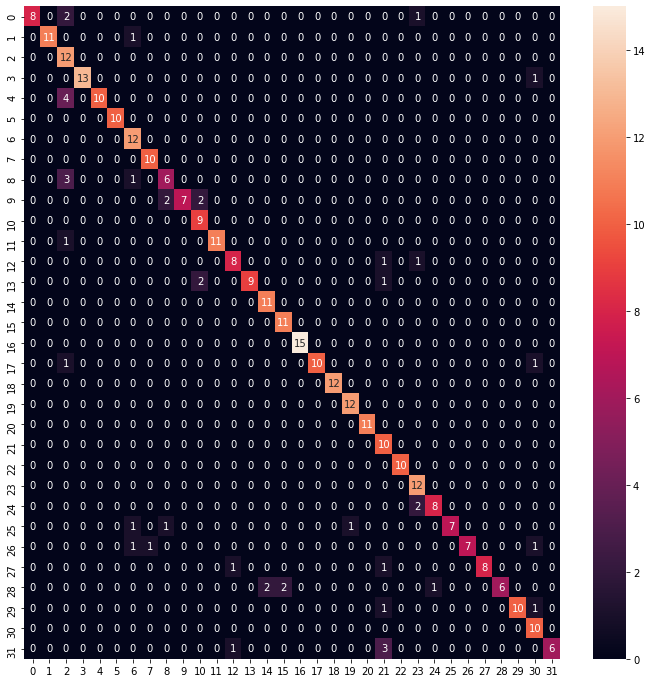

In [53]:
plt.figure(figsize=(12, 12))
sns.heatmap(conf_val, annot=True)